# Results Visualisation
In this notebook, we visualise and interpret the results from the model evaluation. We will compare the performance of the vectorisation methods across the three classification techniques.

## Setting Up Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pickle

## Retrieve the DataFrame

In [3]:
with open('results/results_df.pkl', 'rb') as f:
    results_df = pickle.load(f)

results_df.head(9)

accuracy  precision    recall  \
TF-IDF                Logistic Regression  0.939106   0.972814  0.903632   
                      SVM                  0.948955   0.975104  0.921582   
                      Random Forest        0.946912   0.966593  0.925818   
Word2Vec              Logistic Regression  0.843141   0.848128  0.836022   
                      SVM                  0.855872   0.865597  0.842845   
                      Random Forest        0.873286   0.893094  0.848054   
Sentence Transformers Logistic Regression  0.919169   0.937130  0.898897   
                      SVM                  0.922171   0.944822  0.897017   
                      Random Forest        0.897670   0.930286  0.860301   

                                                 f1  
TF-IDF                Logistic Regression  0.936859  
                      SVM                  0.947527  
                      Random Forest        0.945685  
Word2Vec              Logistic Regression  0.841914  
                      SVM                  0.853873  
                      Random Forest        0.869846  
Sentence Transformers Logistic Regression  0.917542  
                      SVM                  0.920205  
                      Random Forest        0.893745

## Classification Metrics
1. Accuracy: True Positives and True Negatives/All Predictions 
2. Precision: True Positives/True Positives + False Positives
3. Recall: True Positives/True Positives + False Negatives
4. F1: 2 * (1 / Precision + Recall)

Define classifiers, vectorisers, and metrics

In [18]:
clf = ['Logistic Regression', 'SVM', 'Random Forest']
vec = ['TF-IDF', 'Word2Vec', 'Sentence Transformers']
metrics = ['accuracy', 'precision', 'recall', 'f1']

## Generate Visualisations

### Radar Chart
We use 3 radar charts, one for each classification technique, to compare the evaluation metrics for the vectorisation methods.

Built with [Plotly](https://plotly.com/python/radar-chart/)
1. Iterate over classification techniques
2. Generate figure and assign title
3. Iterate over vectorisation methods
4. Generate trace for each vectorisation method
5. theta=metrics
6. r=[evaluation scores]



In [23]:

for classifier in clf:
    fig = go.Figure()
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,1]
            )),
        title_text=classifier)
    for vectoriser in vec:
        fig.add_trace(go.Scatterpolar(
            r = [i for i in results_df.loc[vectoriser, classifier]],
            theta = metrics,
            fill = 'toself',
            name = vectoriser,
        ))
    fig.show()

### Heat Maps
We use 4 heat maps to compare the performance of the vectorisation methods and classifiers for each evaluation metric.

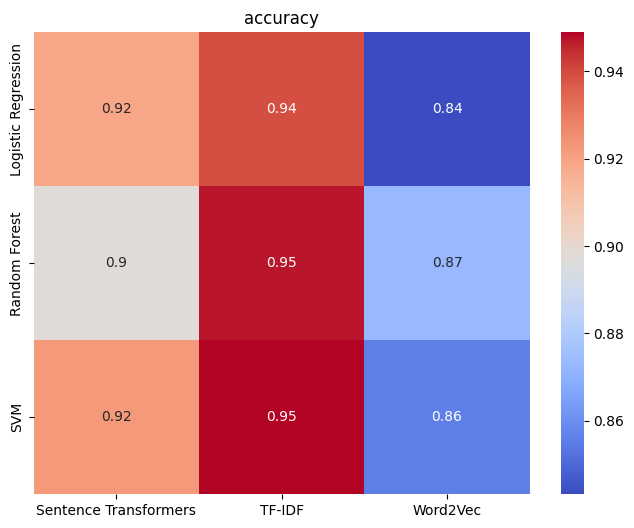

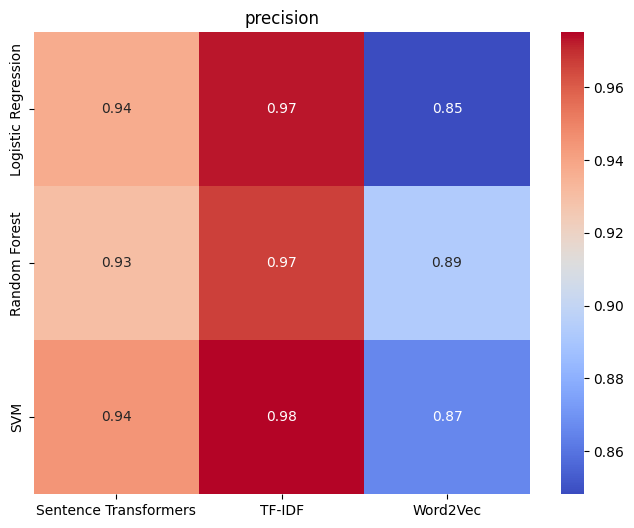

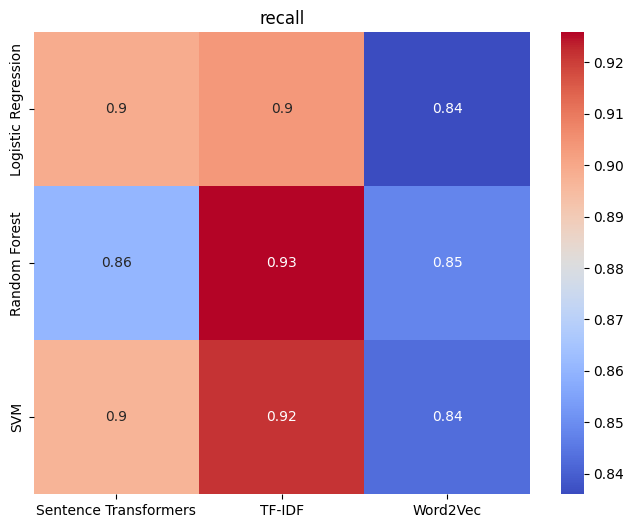

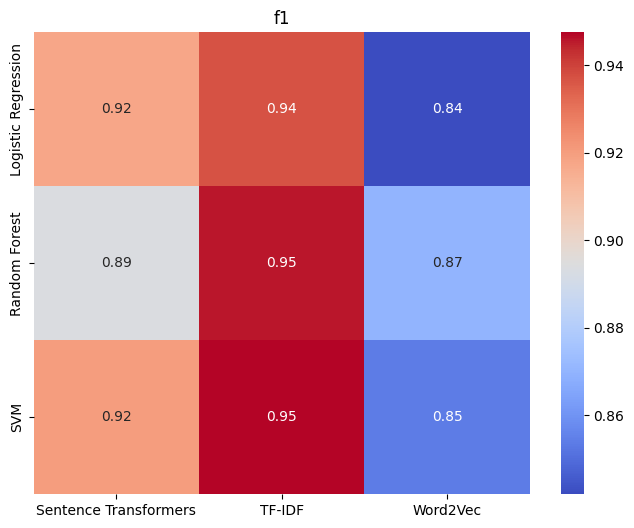

In [25]:
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.heatmap(results_df[metric].unstack().T, annot=True, cmap='coolwarm')
    plt.title(f'{metric}')
    plt.show()

## Analysis of Results

For this classification task, the best-performing vectorisation approach was **TF-IDF**.
- This can be attributed to the fact that offensive speech detection is contingent on specific words or phrases that are indicative of the target class.
- TF-IDF directly captures this information by assigning higher weights to words that are more frequent in offensive speech but less common overall.

Although Word2Vec and Sentence Transformers capture the semantic relationships and context between words, the offensive speech detection task may not require such deep contextual understanding.
- Tweets are often short, resulting in lesser contextual information available for classification. 
- Since offensive content is identifiable primarily through specific words or phrases, TF-IDF's focus on word importance may be the most effective.